<a href="https://colab.research.google.com/github/Ale-0718/Ejemplo_Colab/blob/Andy/PR%C3%81CTICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA PROGRAMACIÓN ORIENTADA A OBJETOS Y MACHINE LEARNING**


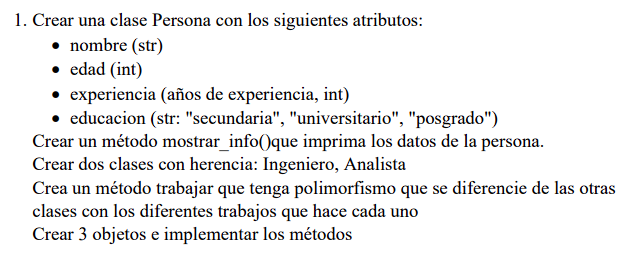

In [ ]:
class Persona:
    def __init__(self, nombre: str, edad: int, experiencia: int, educacion: str):
        self.nombre = nombre
        self.edad = edad
        self.experiencia = experiencia
        self.educacion = educacion

    def mostrar_info(self):
        print(f"Nombre: {self.nombre}")
        print(f"Edad: {self.edad} años")
        print(f"Experiencia: {self.experiencia} años")
        print(f"Educación: {self.educacion}")

    def trabajar(self):
        """Método genérico para el trabajo de una persona."""
        print(f"{self.nombre} está realizando una tarea genérica.")


class Ingeniero(Persona):
    def __init__(self, nombre: str, edad: int, experiencia: int, educacion: str, especialidad: str):
        super().__init__(nombre, edad, experiencia, educacion)
        self.especialidad = especialidad

    def trabajar(self):
        """Método polimórfico para el trabajo de un Ingeniero."""
        print(f"{self.nombre} (Ingeniero de {self.especialidad}) está diseñando un nuevo sistema.")
        print(f"Utilizando sus {self.experiencia} años de experiencia en ingeniería.")


class Analista(Persona):
    def __init__(self, nombre: str, edad: int, experiencia: int, educacion: str, tipo_analista: str):
        super().__init__(nombre, edad, experiencia, educacion)
        self.tipo_analista = tipo_analista

    def trabajar(self):
        """Método polimórfico para el trabajo de un Analista."""
        print(f"{self.nombre} (Analista {self.tipo_analista}) está interpretando grandes conjuntos de datos.")
        print(f"Su rol es crucial para tomar decisiones basadas en datos.")


# Crear 3 objetos e implementar los métodos
print("--- Información de las Personas y sus Trabajos ---")

persona1 = Persona("Brisael Quincho", 19, 10, "universitario")
persona1.mostrar_info()
persona1.trabajar()
print("-" * 30)

ingeniero1 = Ingeniero("Rocio Alvarez", 19, 10, "posgrado", "Software")
ingeniero1.mostrar_info()
ingeniero1.trabajar()
print("-" * 30)

analista1 = Analista("Andrea Huamán ", 19, 5, "universitario", "Software")
analista1.mostrar_info()
analista1.trabajar()
print("-" * 30)

--- Información de las Personas y sus Trabajos ---
Nombre: Brisael Quincho
Edad: 19 años
Experiencia: 10 años
Educación: universitario
Brisael Quincho está realizando una tarea genérica.
------------------------------
Nombre: Rocio Alvarez
Edad: 19 años
Experiencia: 10 años
Educación: posgrado
Rocio Alvarez (Ingeniero de Software) está diseñando un nuevo sistema.
Utilizando sus 10 años de experiencia en ingeniería.
------------------------------
Nombre: Andrea Huamán 
Edad: 19 años
Experiencia: 5 años
Educación: universitario
Andrea Huamán  (Analista Software) está interpretando grandes conjuntos de datos.
Su rol es crucial para tomar decisiones basadas en datos.
------------------------------


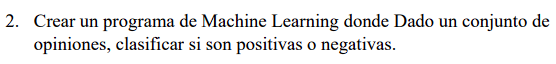

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

print("\n--- Programa de Machine Learning: Clasificación de Sentimiento ---")

# 1. Conjunto de datos de ejemplo (opiniones y sus etiquetas)
opiniones = [
    "Me encanta este producto, es excelente.",  # Positiva
    "Qué horrible servicio al cliente, nunca más.", # Negativa
    "La película fue increíble, la recomiendo totalmente.", # Positiva
    "Demasiado caro y no funciona bien.",        # Negativa
    "Una experiencia muy positiva y agradable.", # Positiva
    "Estoy decepcionado con la calidad.",        # Negativa
    "Funciona a la perfección, estoy muy contento.", # Positiva
    "No lo compraria de nuevo, desperdicio de dinero.", # Negativa
    "Es un producto revolucionario, me sorprendió.", # Positiva
    "El peor día de mi vida con este servicio.", # Negativa
]

sentimientos = [
    "positiva",
    "negativa",
    "positiva",
    "negativa",
    "positiva",
    "negativa",
    "positiva",
    "negativa",
    "positiva",
    "negativa",
]

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
# Esto nos permite evaluar qué tan bien generaliza nuestro modelo
X_train, X_test, y_train, y_test = train_test_split(opiniones, sentimientos, test_size=0.3, random_state=42)

# 3. Vectorización de texto (Convertir texto a números)
# CountVectorizer convierte una colección de documentos de texto en una matriz de recuentos de tokens.
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test) # Usamos transform, no fit_transform, para el conjunto de prueba

# 4. Entrenar un modelo de clasificación
# Multinomial Naive Bayes es un buen clasificador para problemas de clasificación de texto.
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# 5. Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_vec)

# 6. Evaluar el rendimiento del modelo
print("\n--- Evaluación del Modelo ---")
print(f"Precisión (Accuracy): {accuracy_score(y_test, y_pred):.2f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 7. Probar el modelo con nuevas opiniones
print("\n--- Predicciones con Nuevas Opiniones ---")
nuevas_opiniones = [
    "Estoy muy feliz con mi compra, lo recomiendo.",
    "El producto es deficiente y no cumple con lo prometido.",
    "Realmente me gustó la experiencia, fue fantástica.",
    "Pésimo, no sirve para nada."
]

nuevas_opiniones_vec = vectorizer.transform(nuevas_opiniones)
predicciones_nuevas = model.predict(nuevas_opiniones_vec)

for opinion, sentimiento_predicho in zip(nuevas_opiniones, predicciones_nuevas):
    print(f"Opinión: '{opinion}' -> Sentimiento Predicho: {sentimiento_predicho}")


--- Programa de Machine Learning: Clasificación de Sentimiento ---

--- Evaluación del Modelo ---
Precisión (Accuracy): 0.67

Reporte de Clasificación:
              precision    recall  f1-score   support

    negativa       1.00      0.50      0.67         2
    positiva       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3


--- Predicciones con Nuevas Opiniones ---
Opinión: 'Estoy muy feliz con mi compra, lo recomiendo.' -> Sentimiento Predicho: positiva
Opinión: 'El producto es deficiente y no cumple con lo prometido.' -> Sentimiento Predicho: negativa
Opinión: 'Realmente me gustó la experiencia, fue fantástica.' -> Sentimiento Predicho: positiva
Opinión: 'Pésimo, no sirve para nada.' -> Sentimiento Predicho: negativa
